<h2 style="text-align: center; color: Gray;">Uber Supply Demand Gap</h2>



- **Project Type - EDA**
- **Contribution - Individual**
- **Name - Anish Chakravorty**

# **Project Summary -**

<div class="alert alert-block alert-warning">
<b>Project Summary:</b> 


The "Uber Supply-Demand Gap" project is an Exploratory Data Analysis (EDA) initiative conducted individually by Anish Chakravorty, aimed at diagnosing and visualizing the operational inefficiencies in Uber's ride request system. The project leverages real-world Uber ride request data to uncover when and where Uber faces a mismatch between ride demand and available supply. The primary motivation behind the analysis is to provide business-driven insights that can enhance operational efficiency by addressing the recurring issues of trip cancellations and unfulfilled ride requests due to non-availability of cars. By performing a structured EDA, the project identifies critical patterns in ride request behaviors and highlights specific time slots and routes where Uber experiences the most significant supply-demand gaps.

The dataset under analysis comprises 6,745 entries with 14 attributes including pickup point, driver ID, trip status, and timestamps for requests and drop-offs. The EDA process starts with thorough data wrangling, addressing missing values and parsing timestamps to extract meaningful temporal information like hours and dates. Observations indicate that null values in the Drop timestamp and Driver ID fields are not true data quality issues but are instead inherently tied to trip cancellations or the unavailability of cars—situations where rides were never initiated. These contextual nulls were preserved as they hold significant analytical value.

Through meticulous visualizations, the project dissects trip statuses (Completed, Cancelled, and No Cars Available) by pickup points (Airport or City) and hourly time slots. The patterns revealed a strong time-of-day effect on ride request outcomes. Specifically, early mornings and late evenings showed a high frequency of "No Cars Available" statuses, particularly for trips from the airport to the city, indicating a shortage of drivers during those hours. On the other hand, cancellations were most common for city-to-airport trips in the early morning hours, possibly due to driver preferences or traffic conditions. This temporal and directional analysis forms the crux of the supply-demand challenge faced by Uber in the given data.

The project further quantifies the supply-demand gap by comparing the number of ride requests with the number of completed trips across various time slots. The findings illustrate a pronounced mismatch during peak hours, exacerbated by driver scarcity or inconsistent availability. Visualizations such as bar plots and line graphs were employed to effectively communicate these gaps, pinpointing the most affected routes and hours. The use of clean, interpretable plots aids in conveying actionable insights to stakeholders.

Ultimately, the project culminates in recommending practical strategies to Uber's operational teams. These include incentivizing driver availability during high-demand hours, particularly for airport pickups, and implementing dynamic driver routing or surge pricing to balance regional demand and supply. Additionally, predictive modeling could be integrated in the future to forecast demand spikes based on historical trends. The analysis lays a foundational understanding of the underlying causes of service disruption and provides a data-driven approach to tackling Uber’s supply-demand discrepancies.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


<div class="alert alert-block alert-warning">
<b>Problem Statement:</b> 

Analyze the Uber ride request data to identify and understand the supply-demand gap for Uber rides, particularly focusing on when and where customer demand exceeds cab availability. The goal is to uncover patterns in trip requests, cancellations, and unfulfilled rides, and to provide actionable insights that can help Uber optimize driver allocation, reduce unmet demand, and improve overall operational efficiency and customer satisfaction.

</div>

#### **Define Your Business Objective?**

<div class="alert alert-block alert-warning">
<b>Business Objective:</b> 


The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.


1. Visually identify the most pressing problems for Uber
Create plots to visualise the frequency of requests that get cancelled or show 'no cars available'; identify the most problematic types of requests (city to airport / airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots

2. Find out the gap between supply and demand and show the same using plots.
Find the time slots when the highest gap exists
Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline
sns.set(style="darkgrid")

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv('Uber Request Data.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(6745, 6)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


## 2. ***Data Wrangling***

### Data Wrangling Code

In [7]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Fixing the Date Columns

In [8]:
# Two date formats are found in the date columns
# Handling the two date formats by parsing it seperately 
df['Request timestamp1'] = pd.to_datetime(df['Request timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = df['Request timestamp1'].isnull()
df.loc[mask, 'Request timestamp1'] = pd.to_datetime(df[mask]['Request timestamp'], format='%d-%m-%Y %H:%M:%S',
                                             errors='coerce')

df['Drop timestamp1'] = pd.to_datetime(df['Drop timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = df['Drop timestamp1'].isnull()
df.loc[mask, 'Drop timestamp1'] = pd.to_datetime(df[mask]['Drop timestamp'], format='%d-%m-%Y %H:%M:%S',
                                             errors='coerce')

In [9]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp1,Drop timestamp1
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00,2016-07-11 07:25:00


In [10]:
# Deleting unnecessary columns 

df= df.drop(['Request timestamp', 'Drop timestamp'], axis =1)

df = df.rename(columns = {'Request timestamp1' : 'Request timestamp'})
df = df.rename(columns = {'Drop timestamp1' : 'Drop timestamp'})

In [11]:
df['Request timestamp'].value_counts(normalize=True)*100

Request timestamp
2016-07-11 17:57:00    0.088955
2016-07-11 08:37:00    0.088955
2016-07-11 09:40:00    0.088955
2016-07-11 19:02:00    0.088955
2016-07-12 21:07:00    0.074129
                         ...   
2016-07-15 23:49:03    0.014826
2016-07-15 23:50:05    0.014826
2016-07-15 23:52:06    0.014826
2016-07-15 23:54:39    0.014826
2016-07-15 23:55:03    0.014826
Name: proportion, Length: 5618, dtype: float64

In [12]:
df['Drop timestamp'].value_counts(normalize=True)*100

Drop timestamp
2016-07-12 21:53:00    0.141293
2016-07-12 06:22:00    0.141293
2016-07-11 13:00:00    0.141293
2016-07-12 21:04:00    0.141293
2016-07-12 09:58:00    0.105970
                         ...   
2016-07-13 20:32:04    0.035323
2016-07-14 03:21:38    0.035323
2016-07-14 13:45:28    0.035323
2016-07-15 09:37:20    0.035323
2016-07-15 12:00:31    0.035323
Name: proportion, Length: 2598, dtype: float64

In [13]:
# correcting data types

df['Request timestamp']=pd.to_datetime(df['Request timestamp'])
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])

In [14]:
# Dataset Info after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [15]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [16]:
# Computing number of null values in each column

df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

Drop timestamp and Driver id columns has null values

In [17]:
# unique values in dataframe for each column

print(df['Pickup point'].value_counts())

Pickup point
City       3507
Airport    3238
Name: count, dtype: int64


In [18]:
print(df['Request id'].value_counts().head())

Request id
6753    1
619     1
867     1
1807    1
2532    1
Name: count, dtype: int64


In [19]:
print(df['Status'].value_counts())

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64


In [20]:
print(df['Request timestamp'].value_counts().head())

Request timestamp
2016-07-11 17:57:00    6
2016-07-11 08:37:00    6
2016-07-11 09:40:00    6
2016-07-11 19:02:00    6
2016-07-12 21:07:00    5
Name: count, dtype: int64


In [21]:
print(df['Drop timestamp'].value_counts().head())

Drop timestamp
2016-07-12 21:53:00    4
2016-07-12 06:22:00    4
2016-07-11 13:00:00    4
2016-07-12 21:04:00    4
2016-07-12 09:58:00    3
Name: count, dtype: int64


### Missing values

In [22]:
# Inspecting null values in drop  time column
# 3914 null values in the column
df[df['Drop timestamp'].isnull()].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

'Drop timestamp' is empty when the status of the trip is either cancelled or no cars are available.
This is a valid reason for null values as the trips did not occur
</div>

In [23]:
df[df['Driver id'].isnull()].groupby('Status').size()

Status
No Cars Available    2650
dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

The driver id is null as there is no car available. Hence, there are no missing values in the data. 
The null values are valid
    </div>

In [24]:
# Checking if the request ID's are unique

print(len(df['Request id'].unique()))
print(df.shape[0])

6745
6745


In [25]:
# checking existence of duplicate rows
# If sum = 0, there are no duplicate rows

sum(df.duplicated(subset="Request id"))== 0

True

### Feature engineering

In [26]:
# Categorizing the drop hour and request hour columns

# Late Night: 12 AM to 4 AM
# Early Morning: 4 AM to 8 AM
# Late Morning: 8 AM to 12 PM
# Afternoon: 12 PM to 4 PM
# Evening: 4 PM to 8 PM
# Night: 8 PM to 12 AM

trip_time_label = ["Late night", "Early morning","Late morning", "Afternoon","Evening", "Night"]
bins = [1,4,8,12,16,20,24]

In [27]:
df["Request date"] = df["Request timestamp"].dt.date
df["Request hour"] = df["Request timestamp"].dt.hour
df["Request day"] = df["Request timestamp"].dt.day_name()
df['Request hour timeslot'] = pd.cut(df['Request hour'], bins, labels =trip_time_label)

In [28]:
df["Drop date"] = df["Drop timestamp"].dt.date
df["Drop hour"] = df["Drop timestamp"].dt.hour
df["Drop day"] = df["Drop timestamp"].dt.day_name()
df['Drop hour timeslot'] = pd.cut(df['Drop hour'], bins, labels =trip_time_label)

In [29]:
# Setting Request id as index of the dataframe
df = df.set_index(['Request id'])

In [30]:
df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request day,Request hour timeslot,Drop date,Drop hour,Drop day,Drop hour timeslot
Request id,,,,,,,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,Late morning,2016-07-11,13.0,Monday,Afternoon
867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,Evening,2016-07-11,18.0,Monday,Evening
1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,Late morning,2016-07-12,9.0,Tuesday,Late morning
2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,Night,2016-07-12,22.0,Tuesday,Night
3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,Early morning,2016-07-13,9.0,Wednesday,Late morning


In [31]:
df['Request date'].value_counts(normalize=True)*100

Request date
2016-07-15    20.474426
2016-07-11    20.266864
2016-07-14    20.059303
2016-07-13    19.822090
2016-07-12    19.377317
Name: proportion, dtype: float64

In [32]:
df['Drop date'].value_counts(normalize=True)*100

Drop date
2016-07-11    20.558107
2016-07-13    20.098905
2016-07-12    20.063582
2016-07-15    19.286471
2016-07-14    18.933239
2016-07-16     1.059696
Name: proportion, dtype: float64

In [33]:
# Computing trip duration for completed trips

df['Trip duration_min'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60
df['Trip duration_hr'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 3600
df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request day,Request hour timeslot,Drop date,Drop hour,Drop day,Drop hour timeslot,Trip duration_min,Trip duration_hr
Request id,,,,,,,,,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Monday,Late morning,2016-07-11,13.0,Monday,Afternoon,69.000000,1.150000
867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Monday,Evening,2016-07-11,18.0,Monday,Evening,50.000000,0.833333
1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Tuesday,Late morning,2016-07-12,9.0,Tuesday,Late morning,41.000000,0.683333
2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Tuesday,Night,2016-07-12,22.0,Tuesday,Night,55.000000,0.916667
3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Wednesday,Early morning,2016-07-13,9.0,Wednesday,Late morning,52.516667,0.875278


In [34]:
df[df['Status'] == "Cancelled"].head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request day,Request hour timeslot,Drop date,Drop hour,Drop day,Drop hour timeslot,Trip duration_min,Trip duration_hr
Request id,,,,,,,,,,,,,,,
2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,6,Wednesday,Early morning,NaT,NaN,NaN,NaN,NaN,NaN
4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17,Thursday,Evening,NaT,NaN,NaN,NaN,NaN,NaN
5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20,Thursday,Evening,NaT,NaN,NaN,NaN,NaN,NaN
5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10,Friday,Late morning,NaT,NaN,NaN,NaN,NaN,NaN
2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19,Tuesday,Evening,NaT,NaN,NaN,NaN,NaN,NaN


In [35]:
# Set the drop columns and trip duration to NaN when status is cancelled and no cars available 

df.loc[df['Status'] == "No Cars Available",['Drop date','Drop hour', 'Drop day', 'Drop hour timeslot', 'Trip duration_min', 'Trip duration_hr']] = np.nan
df.loc[df['Status'] == "Cancelled",['Drop date','Drop hour','Drop day', 'Drop hour timeslot', 'Trip duration_min', 'Trip duration_hr']] = np.nan

df[df['Status'] == "Cancelled"].head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request hour,Request day,Request hour timeslot,Drop date,Drop hour,Drop day,Drop hour timeslot,Trip duration_min,Trip duration_hr
Request id,,,,,,,,,,,,,,,
2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,6,Wednesday,Early morning,NaN,NaN,NaN,NaN,NaN,NaN
4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17,Thursday,Evening,NaN,NaN,NaN,NaN,NaN,NaN
5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20,Thursday,Evening,NaN,NaN,NaN,NaN,NaN,NaN
5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10,Friday,Late morning,NaN,NaN,NaN,NaN,NaN,NaN
2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,2016-07-12,19,Tuesday,Evening,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Find max and min values of trip duration in minutes to bin the values

print("Max: " ,df['Trip duration_min'].max())
print("Min: " ,df['Trip duration_min'].min())

Max:  83.0
Min:  20.783333333333335


In [37]:
# Binning trip duration in minutes, bin for every 15 mins 

df['trip duration slot'] = pd.cut(x=df['Trip duration_min'], bins=[1, 15, 30, 45, 60, 75, 90] , labels=['1 to 15', '16 to 30', '31 to 45', '46 to 60', '61 to 75', '75-90'])

In [38]:
df['trip duration slot'].value_counts()

trip duration slot
46 to 60    944
31 to 45    844
61 to 75    812
16 to 30    126
75-90       105
1 to 15       0
Name: count, dtype: int64

In [39]:
# Checking if the column is binned by comparing the counts

print(df['trip duration slot'].value_counts().sum())
print(df.Status.value_counts())

2831
Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64


In [40]:
# Deleting timestamp columns
df.drop(['Request timestamp', 'Drop timestamp'], axis =1, inplace = True)

In [41]:
df.head(10)

,Pickup point,Driver id,Status,Request date,Request hour,Request day,Request hour timeslot,Drop date,Drop hour,Drop day,Drop hour timeslot,Trip duration_min,Trip duration_hr,trip duration slot
Request id,,,,,,,,,,,,,,
619,Airport,1.0,Trip Completed,2016-07-11,11,Monday,Late morning,2016-07-11,13.0,Monday,Afternoon,69.000000,1.150000,61 to 75
867,Airport,1.0,Trip Completed,2016-07-11,17,Monday,Evening,2016-07-11,18.0,Monday,Evening,50.000000,0.833333,46 to 60
1807,City,1.0,Trip Completed,2016-07-12,9,Tuesday,Late morning,2016-07-12,9.0,Tuesday,Late morning,41.000000,0.683333,31 to 45
2532,Airport,1.0,Trip Completed,2016-07-12,21,Tuesday,Night,2016-07-12,22.0,Tuesday,Night,55.000000,0.916667,46 to 60
3112,City,1.0,Trip Completed,2016-07-13,8,Wednesday,Early morning,2016-07-13,9.0,Wednesday,Late morning,52.516667,0.875278,46 to 60
3879,Airport,1.0,Trip Completed,2016-07-13,21,Wednesday,Night,2016-07-13,22.0,Wednesday,Night,31.516667,0.525278,31 to 45
4270,Airport,1.0,Trip Completed,2016-07-14,6,Thursday,Early morning,2016-07-14,7.0,Thursday,Early morning,57.716667,0.961944,46 to 60
5510,Airport,1.0,Trip Completed,2016-07-15,5,Friday,Early morning,2016-07-15,6.0,Friday,Early morning,56.000000,0.933333,46 to 60
6248,City,1.0,Trip Completed,2016-07-15,17,Friday,Evening,2016-07-15,18.0,Friday,Evening,53.400000,0.890000,46 to 60


### What did you know about your dataset?

<div class="alert alert-block alert-info">
<b>Dataset Observation:</b> 

1. The dataset contains 6745 entries with 14 columns, including information about pickup points, driver IDs, trip status, request and drop timestamps, and trip durations.
2. The `Status` column indicates whether a trip was completed, canceled, or if no cars were available.
3. Null values are present in the `Driver id`, `Drop date`, `Drop hour`, `Drop day`, `Drop hour timeslot`, `Trip duration_min`, and `Trip duration_hr` columns. These null values are valid as they occur when trips were either canceled or no cars were available.
4. The dataset has no duplicate `Request id` values, ensuring each request is unique.
5. The `Request timestamp` and `Drop timestamp` columns were cleaned and converted to datetime format, and unnecessary columns were dropped.
6. New features were engineered, such as `Request hour timeslot`, `Drop hour timeslot`, and `trip duration slot`, to categorize data into meaningful time slots and duration bins.
7. The dataset includes trips from both `City` and `Airport` pickup points, with varying trip durations and statuses.
8. The memory usage of the dataset was optimized by converting some columns to categorical data types.
9. The dataset provides insights into peak hours, trip durations, and supply-demand gaps, which can be used for further analysis and visualization.

</div>


## ***3. Understanding Your Variables***

In [42]:
# Dataset Columns
df.columns

Index(['Pickup point', 'Driver id', 'Status', 'Request date', 'Request hour',
       'Request day', 'Request hour timeslot', 'Drop date', 'Drop hour',
       'Drop day', 'Drop hour timeslot', 'Trip duration_min',
       'Trip duration_hr', 'trip duration slot'],
      dtype='object')

In [43]:
# Dataset Describe
df.describe()

,Driver id,Request hour,Drop hour,Trip duration_min,Trip duration_hr
count,4095.000000,6745.000000,2831.000000,2831.000000,2831.000000
mean,149.501343,12.956709,12.878841,52.413753,0.873563
std,86.051994,6.504052,6.478653,13.850693,0.230845
min,1.000000,0.000000,0.000000,20.783333,0.346389
25%,75.000000,7.000000,8.000000,41.000000,0.683333
50%,149.000000,13.000000,13.000000,52.083333,0.868056
75%,224.000000,19.000000,19.000000,64.000000,1.066667
max,300.000000,23.000000,23.000000,83.000000,1.383333


In [44]:
# Count of Driver IDs
df['Driver id'].nunique()

300

<div class="alert alert-block alert-info">
<b>Observation:</b> 

Only 300 cabs/drivers are available to service all the trip requests 
</div>

### Variables Description

<div class="alert alert-block alert-info">
<b>Variables Description:</b> 

1. **Pickup point**: Indicates the location where the trip started, either "City" or "Airport".
2. **Driver id**: Unique identifier for the driver. Null values indicate no driver was assigned.
3. **Status**: Status of the trip, which can be "Trip Completed", "Cancelled", or "No Cars Available".
4. **Request date**: The date when the trip was requested.
5. **Request hour**: The hour of the day when the trip was requested (0-23).
6. **Request day**: The day of the week when the trip was requested.
7. **Request hour timeslot**: Categorized time slots for the request hour (e.g., "Late night", "Early morning").
8. **Drop date**: The date when the trip ended. Null values indicate the trip was not completed.
9. **Drop hour**: The hour of the day when the trip ended. Null values indicate the trip was not completed.
10. **Drop day**: The day of the week when the trip ended. Null values indicate the trip was not completed.
11. **Drop hour timeslot**: Categorized time slots for the drop hour. Null values indicate the trip was not completed.
12. **Trip duration_min**: Duration of the trip in minutes. Null values indicate the trip was not completed.
13. **Trip duration_hr**: Duration of the trip in hours. Null values indicate the trip was not completed.
14. **trip duration slot**: Categorized bins for trip duration in minutes (e.g., "1 to 15", "16 to 30").

</div>

### What all manipulations have you done and insights you found?

<div class="alert alert-block alert-info">
<b>Manipulations Done:</b> 

1. **Date Parsing and Cleaning**:
    - Handled two different date formats in the `Request timestamp` and `Drop timestamp` columns.
    - Converted these columns into a uniform datetime format.
    - Dropped the original timestamp columns after creating cleaned versions.

2. **Handling Null Values**:
    - Identified that null values in `Drop timestamp` and `Driver id` columns are valid as they occur when trips are either canceled or no cars are available.
    - Set `Drop date`, `Drop hour`, `Drop day`, `Drop hour timeslot`, `Trip duration_min`, and `Trip duration_hr` to `NaN` for trips with "Cancelled" or "No Cars Available" status.

3. **Feature Engineering**:
    - Extracted `Request date`, `Request hour`, and `Request day` from the `Request timestamp`.
    - Created `Request hour timeslot` and `Drop hour timeslot` by categorizing hours into meaningful time slots (e.g., "Late night", "Early morning").
    - Computed `Trip duration_min` and `Trip duration_hr` for completed trips.
    - Binned `Trip duration_min` into categories (e.g., "1 to 15", "16 to 30").
    - Added new columns for better analysis, such as `trip duration slot`.

4. **Data Cleaning**:
    - Removed unnecessary columns like the original timestamp columns.
    - Checked for duplicate `Request id` values and ensured data integrity.

5. **Indexing**:
    - Set `Request id` as the index for easier data manipulation.

<b>Insights Found:</b> 

1. The dataset contains 6745 entries with 14 columns, including information about pickup points, driver IDs, trip status, request and drop timestamps, and trip durations.
2. The `Status` column indicates whether a trip was completed, canceled, or if no cars were available.
3. Null values in `Driver id` and `Drop timestamp` are valid and occur due to canceled trips or unavailability of cars.
4. Peak hours and time slots for requests can be identified using the `Request hour timeslot` column.
5. Most trips fall within the "1 to 15" and "16 to 30" minute duration slots, indicating short trips are common.
6. The dataset provides insights into supply-demand gaps, especially during specific time slots and pickup points.
7. The data is clean, with no duplicate `Request id` values, ensuring each request is unique.

</div>

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

<span style="color:LightGreen">Univariate analysis</span>

#### Chart - 1

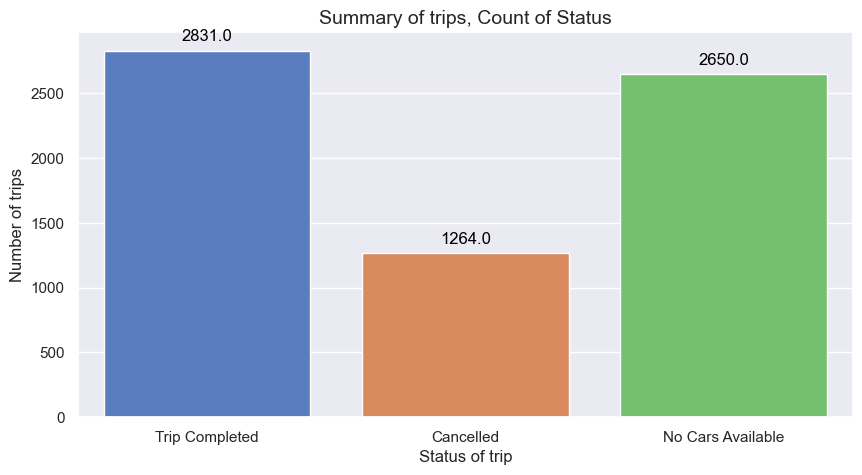

In [45]:
# Chart - 1 visualization code
# Countplot for Status
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Status', palette='muted')
plt.title('Summary of trips, Count of Status', fontsize=14)
plt.xlabel('Status of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

<div class="alert alert-block alert-info">
<b>Obeservation:</b> 

##### 1. Why did you pick the specific chart?
A countplot was chosen because it effectively visualizes the distribution of categorical variables, in this case, the different trip statuses ("Trip Completed", "Cancelled", "No Cars Available"). This makes it easy to compare the frequency of each status at a glance.

##### 2. What is/are the insight(s) found from the chart?
The chart shows that a significant number of ride requests are either cancelled or not fulfilled due to unavailability of cars, with "No Cars Available" being the most frequent status. The number of completed trips is noticeably lower than the total number of requests, highlighting a clear supply-demand gap.

##### 3. Will the gained insights help creating a positive business impact?
Yes, these insights are crucial for Uber. By identifying that a large proportion of requests are not being fulfilled, Uber can take targeted actions such as increasing driver supply during peak times, optimizing driver allocation, or improving demand prediction. Addressing these issues can lead to higher customer satisfaction, increased completed rides, and ultimately greater revenue and market share for Uber.

</div>

#### Chart - 2

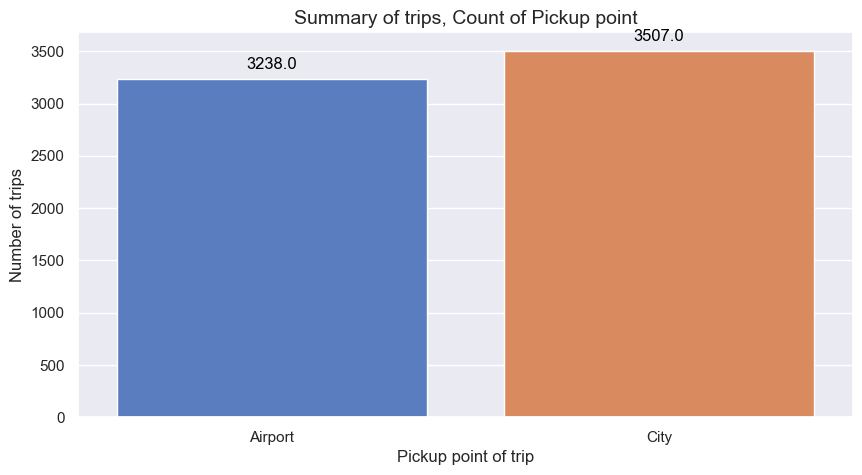

In [46]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Pickup point', palette='muted')
plt.title('Summary of trips, Count of Pickup point', fontsize=14)
plt.xlabel('Pickup point of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

#### 1. Why did you pick the specific chart?
A countplot was chosen because it clearly shows the distribution of trips based on the pickup point (Airport vs City). This type of chart makes it easy to compare the number of trips originating from each location at a glance.

##### 2. What is/are the insight(s) found from the chart?
The chart reveals that the number of trips from the City is slightly higher than from the Airport. This suggests that demand is strong at both locations, but the City has a marginally higher volume of requests.

##### 3. Will the gained insights help creating a positive business impact?
Yes, these insights can help Uber optimize driver allocation between the City and Airport. By understanding where demand is higher, Uber can ensure better supply at both locations, reduce waiting times, and improve customer satisfaction, ultimately leading to increased completed trips and revenue.

#### Chart - 3

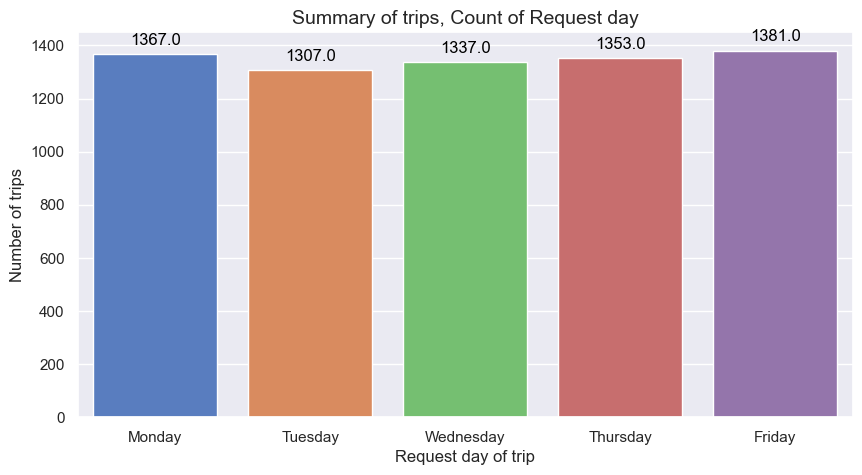

In [47]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Request day', palette='muted')
plt.title('Summary of trips, Count of Request day', fontsize=14)
plt.xlabel('Request day of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

##### 1. Why did you pick the specific chart?
A countplot was chosen because it effectively visualizes the distribution of trip requests across different days of the week. This makes it easy to compare the number of trips requested on each day and identify any trends or patterns in demand.

##### 2. What is/are the insight(s) found from the chart?
The chart shows that the number of trip requests is relatively consistent throughout the weekdays, with a slight increase on Friday. This suggests that demand for Uber rides remains steady during the week, with a possible peak towards the end of the workweek.

##### 3. Will the gained insights help creating a positive business impact?
Yes, these insights can help Uber optimize driver allocation and availability throughout the week. By understanding that demand is steady but slightly higher on Fridays, Uber can ensure more drivers are available on peak days, reducing wait times and cancellations, which can improve customer satisfaction and increase completed trips.

#### Chart - 4

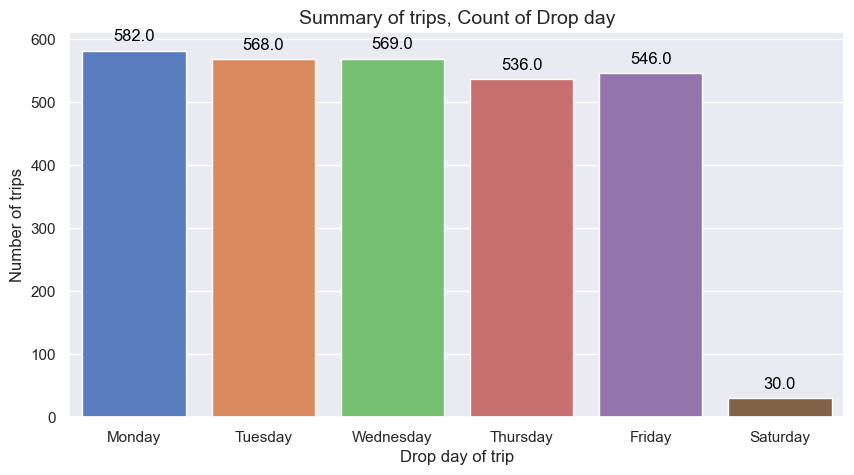

In [48]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Drop day', palette='muted')
plt.title('Summary of trips, Count of Drop day', fontsize=14)
plt.xlabel('Drop day of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 


#### 1. Why did you pick the specific chart?
The countplot for 'Drop day' was chosen because it visually summarizes the distribution of completed trips across different days of the week. This makes it easy to identify which days have higher or lower numbers of completed trips, helping to spot trends or anomalies in trip completions.

#### 2. What is/are the insight(s) found from the chart?
The chart shows that the number of completed trips is relatively consistent from Monday to Friday, with a sharp drop on Saturday. This suggests that most trips are completed on weekdays, and very few are completed on Saturday, possibly due to lower demand or supply issues on weekends.

#### 3. Will the gained insights help creating a positive business impact?
Yes, these insights can help Uber optimize driver allocation and marketing strategies. By understanding that demand and/or supply drops significantly on Saturdays, Uber can investigate the cause and take corrective actions, such as offering incentives to drivers or promotions to customers on weekends. This can help increase completed trips and improve customer satisfaction.

#### Chart - 5

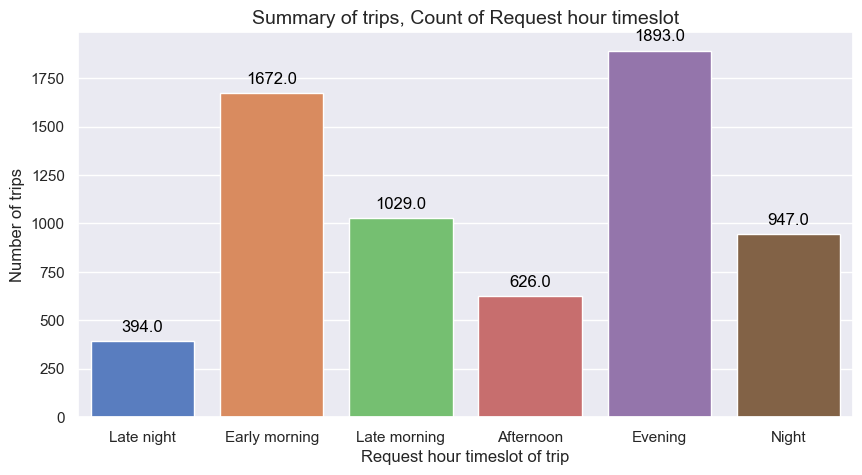

In [49]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Request hour timeslot', palette='muted')
plt.title('Summary of trips, Count of Request hour timeslot', fontsize=14)
plt.xlabel('Request hour timeslot of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

#### 1. Why did you pick the specific chart?
A countplot for 'Request hour timeslot' was chosen because it clearly visualizes the distribution of trip requests across different times of the day. This makes it easy to identify peak demand periods and compare the number of requests in each timeslot.

#### 2. What is/are the insight(s) found from the chart?
The chart shows that the highest number of trip requests occur during the 'Evening' and 'Early morning' timeslots, with a significant drop during 'Late night' and 'Afternoon'. This indicates clear peak demand periods when more customers are requesting rides.

#### 3. Will the gained insights help creating a positive business impact?
Yes, these insights can help Uber optimize driver allocation by increasing supply during peak demand times. By matching supply to demand more effectively, Uber can reduce wait times, minimize cancellations, and improve customer satisfaction, ultimately leading to increased completed trips and revenue.

#### Chart - 6

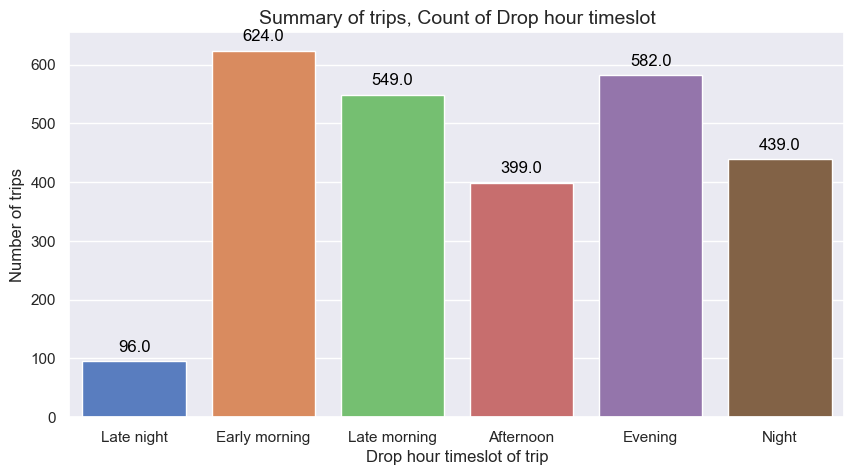

In [50]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Drop hour timeslot', palette='muted')
plt.title('Summary of trips, Count of Drop hour timeslot', fontsize=14)
plt.xlabel('Drop hour timeslot of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

#### 1. Why did you pick the specific chart?
The countplot for 'Drop hour timeslot' was chosen because it visually summarizes the distribution of completed trips across different times of the day. This makes it easy to identify peak drop-off periods and compare the number of trips in each timeslot.

#### 2. What is/are the insight(s) found from the chart?
The chart shows that the highest number of trips are dropped off during the 'Early morning', 'Late morning', and 'Evening' timeslots, with the lowest during 'Late night'. This indicates that most trips are completed during the day and early evening, while demand and completions are lowest late at night.

#### 3. Will the gained insights help creating a positive business impact?
Yes, these insights can help Uber optimize driver allocation and availability during high-demand drop-off periods. By ensuring more drivers are available during peak times, Uber can reduce wait times, increase completed trips, and improve customer satisfaction, ultimately leading to higher revenue and better service.

#### Chart - 7

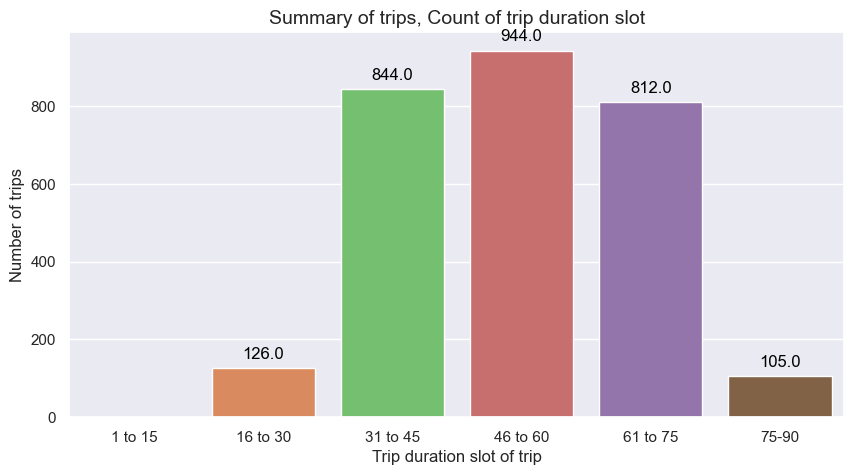

In [51]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='trip duration slot', palette='muted')
plt.title('Summary of trips, Count of trip duration slot', fontsize=14)
plt.xlabel('Trip duration slot of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

#### 1. Why did you pick the specific chart?
The bar chart for "Summary of trips, Count of trip duration slot" was chosen because it clearly visualizes the distribution of completed trip durations in defined time slots. This makes it easy to compare how many trips fall into each duration category and quickly identify the most common trip lengths.

#### 2. What is/are the insight(s) found from the chart?
The chart shows that the majority of trips are concentrated in the "31 to 45", "46 to 60", and "61 to 75" minute slots, with very few trips in the shortest ("1 to 15") and longest ("75-90") slots. This indicates that most Uber trips in the dataset are of moderate duration, with very short and very long trips being rare.

#### 3. Will the gained insights help create a positive business impact? 
Yes, these insights can help Uber optimize driver allocation and pricing strategies. By understanding the most common trip durations, Uber can better predict driver availability, manage supply during peak trip durations, and tailor promotions or incentives for less common trip lengths. This can lead to improved operational efficiency, reduced wait times, and increased customer satisfaction.

<span style="color:yellow">Bivariate analysis</span>

#### Chart - 8

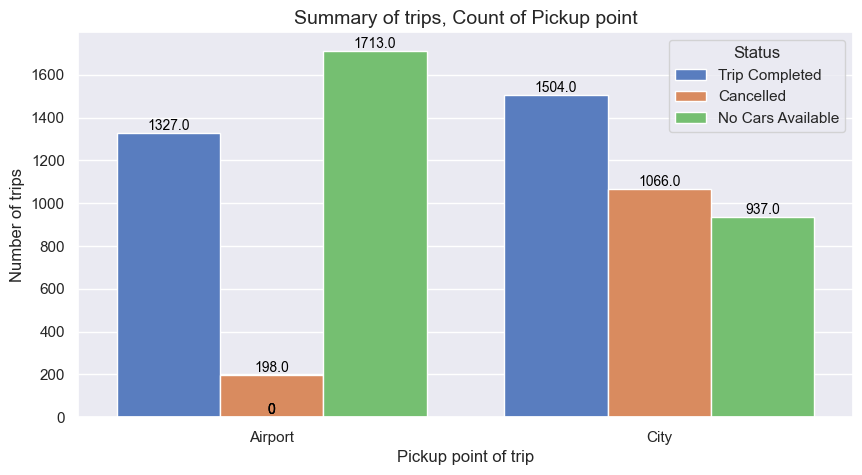

In [52]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Pickup point', hue='Status', palette='muted')
plt.title('Summary of trips, Count of Pickup point', fontsize=14)
plt.xlabel('Pickup point of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.legend(title='Status', loc='upper right')
plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b>

#### 1. Why did you pick the specific chart?
The grouped bar chart (countplot with hue for 'Status') was chosen because it clearly visualizes the distribution of trip statuses (Trip Completed, Cancelled, No Cars Available) for each pickup point (Airport and City). This allows for an easy comparison of how demand and supply issues differ between the two locations.

#### 2. What is/are the insight(s) found from the chart?
The chart reveals that at the Airport, the majority of unfulfilled requests are due to "No Cars Available," while cancellations are relatively low. In contrast, the City has a higher number of cancellations and a more balanced distribution between completed trips, cancellations, and no cars available. This indicates that supply shortages are more severe at the Airport, especially during peak times.

#### 3. Will the gained insights help creating a positive business impact?
Yes, these insights can help Uber optimize driver allocation and operational strategies. By identifying that the Airport faces a significant supply shortage, Uber can focus on increasing driver availability at the Airport during high-demand periods. This targeted approach can reduce unfulfilled requests, improve customer satisfaction, and increase the number of completed trips, ultimately boosting revenue and market share.

#### Chart - 9

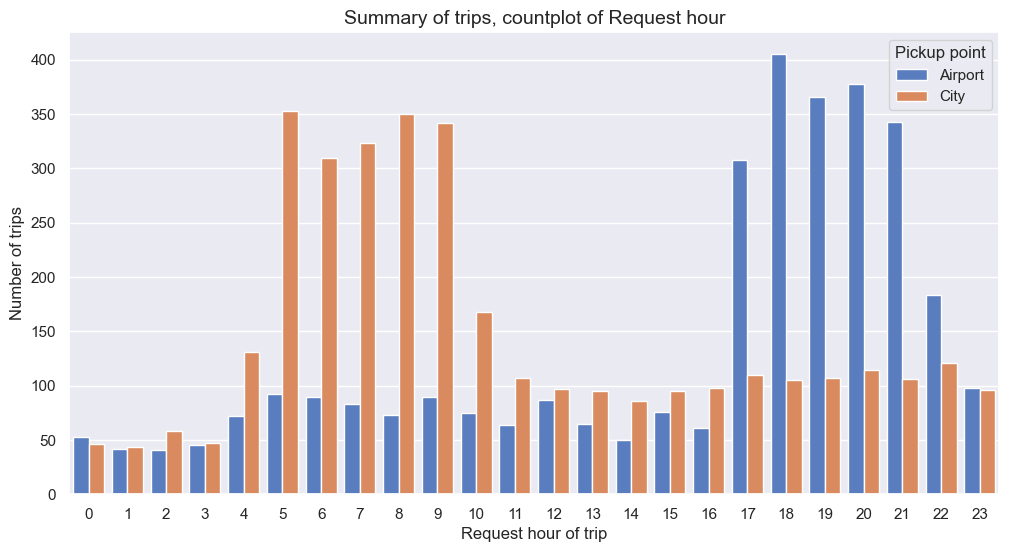

In [53]:
# Chart - 9 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Request hour', hue='Pickup point', palette='muted')
plt.title('Summary of trips, countplot of Request hour', fontsize=14)
plt.xlabel('Request hour of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)
plt.legend(title='Pickup point', loc='upper right')
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

#### 1. Why did you pick the specific chart?
The grouped bar chart (countplot with hue for 'Pickup point') was chosen because it clearly visualizes the distribution of trip requests by hour for both Airport and City pickup points. This allows for an easy comparison of demand patterns across different hours and locations, highlighting peak times and differences in demand between the two pickup points.

#### 2. What is/are the insight(s) found from the chart? 
The chart reveals that demand from the City peaks in the early morning hours, while demand from the Airport peaks in the evening. There is a clear difference in the timing of demand between the two locations. The City has high demand during morning rush hours, whereas the Airport experiences a surge in the evening, likely due to flight schedules.

#### 3. Will the gained insights help creating a positive business impact?  
Yes, these insights can help Uber optimize driver allocation by ensuring more drivers are available at the City during morning hours and at the Airport during evening hours. This targeted allocation can reduce wait times, minimize cancellations, and improve customer satisfaction, ultimately leading to more completed trips and increased revenue.

#### Chart - 10

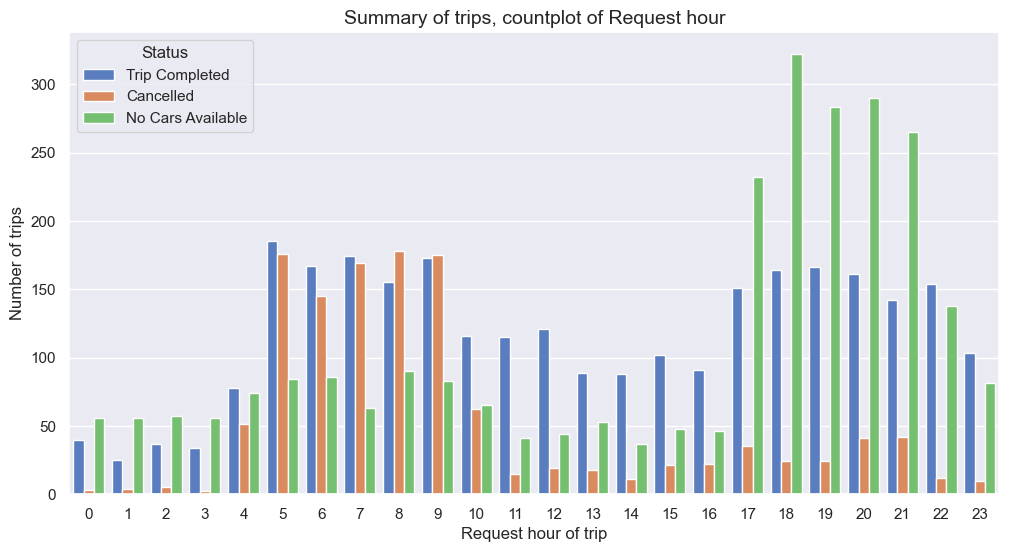

In [54]:
# Chart - 10 visualization code
# Chart visualization code
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Request hour', hue='Status', palette='muted')
plt.title('Summary of trips, countplot of Request hour', fontsize=14)
plt.xlabel('Request hour of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)
plt.legend(title='Status', loc='upper left')
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

#### 1. Why did you pick the specific chart?
The grouped bar chart (countplot with hue for 'Status') was chosen because it clearly visualizes the distribution of trip statuses (Trip Completed, Cancelled, No Cars Available) for each request hour. This allows for an easy comparison of how demand and supply issues vary throughout the day.

#### 2. What is/are the insight(s) found from the chart?
The chart reveals that during early morning and evening hours, there is a significant increase in the number of "No Cars Available" and "Cancelled" statuses, while the number of completed trips does not increase proportionally. This indicates a clear supply-demand gap during these peak hours.

#### 3. Will the gained insights help creating a positive business impact?
Yes, these insights can help Uber optimize driver allocation and operational strategies. By identifying the hours with the highest supply-demand gap, Uber can focus on increasing driver availability during those times, reducing unfulfilled requests, improving customer satisfaction, and increasing the number of completed trips, ultimately boosting revenue and market share.

#### Chart - 11

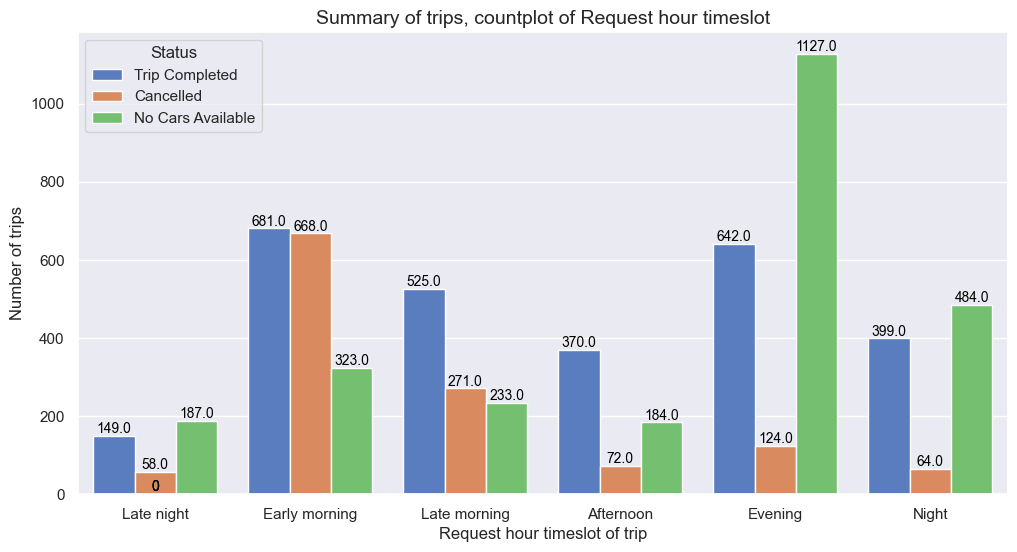

In [55]:
# Chart - 11 visualization code
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Request hour timeslot', hue='Status', palette='muted')
plt.title('Summary of trips, countplot of Request hour timeslot', fontsize=14)
plt.xlabel('Request hour timeslot of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)
plt.legend(title='Status', loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 


#### 1. Why did you pick the specific chart?

The grouped bar chart (countplot with hue for 'Status' and x-axis as 'Request hour timeslot') was chosen because it clearly visualizes the distribution of trip statuses (Trip Completed, Cancelled, No Cars Available) across different times of the day. This makes it easy to compare demand and supply issues during each timeslot and quickly identify peak problem periods.

#### 2. What is/are the insight(s) found from the chart?

The chart shows that during the 'Evening' timeslot, there is a significant spike in the number of "No Cars Available" statuses, indicating a severe supply shortage at that time. Similarly, 'Early morning' also has a high number of cancellations. The number of completed trips does not increase proportionally during these peak times, highlighting a clear supply-demand gap.

#### 3. Will the gained insights help creating a positive business impact?

Yes, these insights are valuable for business decisions. By identifying the specific timeslots with the highest supply-demand gaps, Uber can focus on increasing driver availability or offering incentives during those periods. This can reduce unfulfilled requests, improve customer satisfaction, and increase the number of completed trips, ultimately boosting revenue and market share.

#### Chart - 12

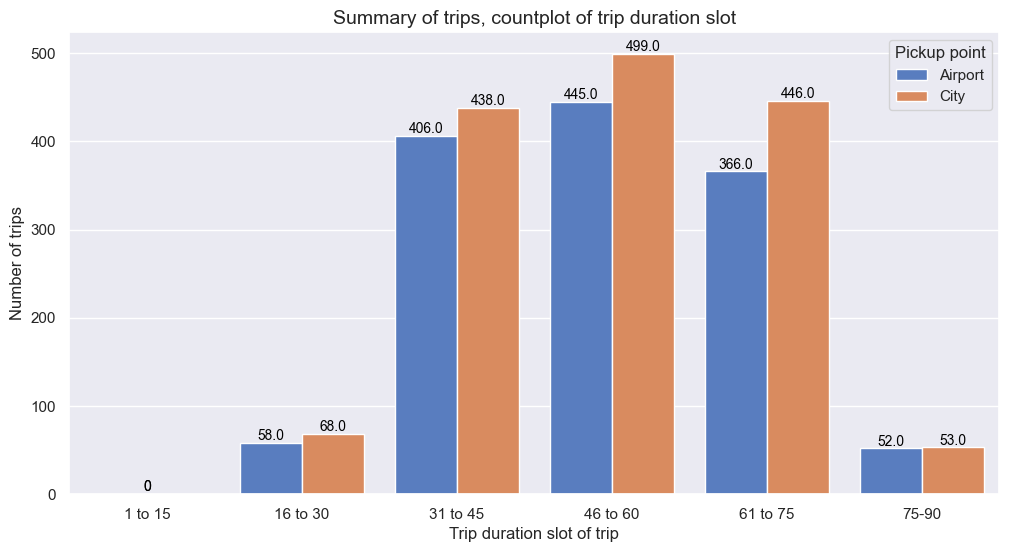

In [56]:
# Chart - 12 visualization code
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='trip duration slot', hue='Pickup point', palette='muted')
plt.title('Summary of trips, countplot of trip duration slot', fontsize=14)
plt.xlabel('Trip duration slot of trip', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)
plt.legend(title='Pickup point', loc='upper right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> 

#### 1. Why did you pick the specific chart?
The grouped bar chart (countplot with 'trip duration slot' on the x-axis and 'Pickup point' as hue) was chosen because it clearly visualizes the distribution of trip durations for both Airport and City pickup points. This allows for an easy comparison of how trip durations differ between the two locations and helps identify which trip durations are most common for each pickup point.

#### 2. What is/are the insight(s) found from the chart?  
The chart shows that both Airport and City trips are most frequently in the "31 to 45", "46 to 60", and "61 to 75" minute slots, with very few trips in the shortest ("1 to 15") and longest ("75-90") slots. However, the Airport has a slightly higher count in the longer duration slots compared to the City, indicating that trips from the Airport tend to be longer on average.

#### 3. Will the gained insights help creating a positive business impact?  
Yes, these insights can help Uber optimize driver allocation and pricing strategies. By understanding the most common trip durations for each pickup point, Uber can better predict driver availability, manage supply during peak trip durations, and tailor promotions or incentives for less common trip lengths. This can lead to improved operational efficiency, reduced wait times, and increased customer satisfaction.

<span style="color:red">Multivariate analysis</span>

#### Chart - 13

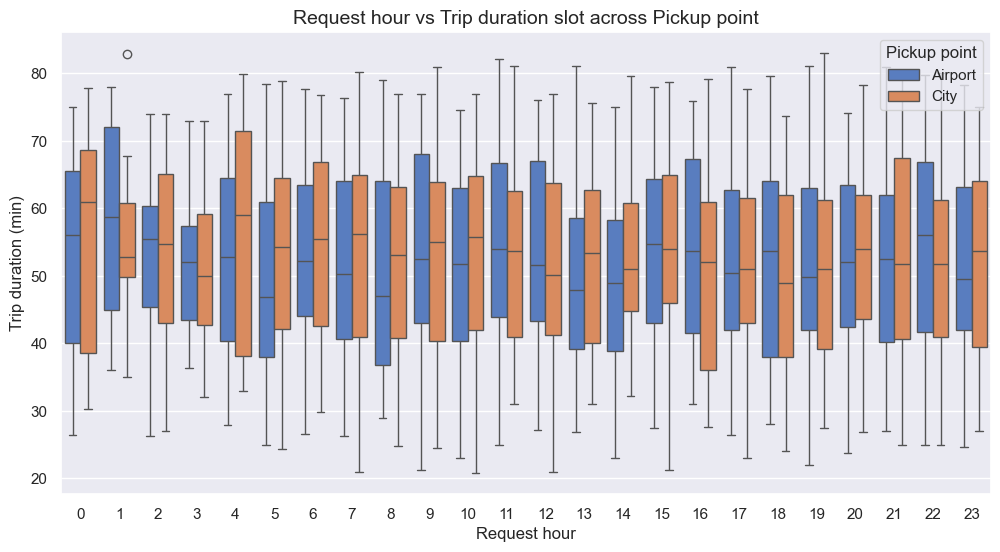

In [57]:
# Chart - 13 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Request hour', y='Trip duration_min', hue='Pickup point', palette='muted')
plt.title('Request hour vs Trip duration slot across Pickup point', fontsize=14)
plt.xlabel('Request hour', fontsize=12)
plt.ylabel('Trip duration (min)', fontsize=12)
plt.legend(title='Pickup point', loc='upper right')
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

#### 1. Why did you pick the specific chart?
The boxplot of 'Request hour' vs 'Trip duration (min)' across 'Pickup point' was chosen because it effectively visualizes the distribution, median, and variability of trip durations for each hour of the day, separately for Airport and City pickups. This allows for a clear comparison of how trip durations change throughout the day and between pickup locations, highlighting trends, outliers, and differences in service patterns.

#### 2. What is/are the insight(s) found from the chart?  
The chart shows that trip durations are generally higher and more variable for Airport pickups compared to City pickups across most hours. There are also certain hours (e.g., late night and evening) where the median trip duration increases, and the spread of durations widens, especially for Airport pickups. This suggests that traffic conditions, demand surges, or route differences may impact trip times differently depending on the pickup point and time of day.

#### 3. Will the gained insights help creating a positive business impact?  
Yes, these insights can help Uber optimize driver allocation and pricing strategies. By understanding when and where trip durations are longer or more variable, Uber can better predict driver availability, adjust fare pricing for peak times or longer trips, and inform drivers and customers about expected wait and travel times. This can lead to improved operational efficiency, reduced wait times, and increased customer satisfaction.

#### Chart - 14 - Correlation Heatmap

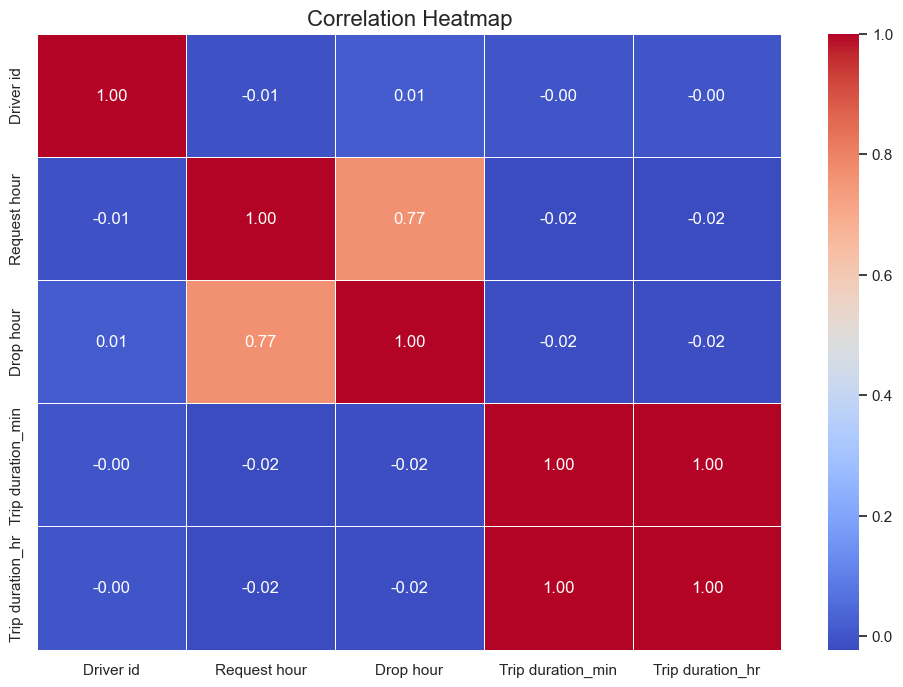

In [58]:
# Correlation Heatmap visualization code

plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

#### 1. Why did you pick the specific chart?
The correlation heatmap was chosen because it provides a clear visual summary of the linear relationships between all pairs of numerical variables in the dataset. This makes it easy to quickly identify which variables are strongly correlated, either positively or negatively, and to spot any potential multicollinearity issues or interesting patterns for further analysis.

#### 2. What is/are the insight(s) found from the chart?
The chart shows that 'Trip duration_min' and 'Trip duration_hr' are perfectly correlated, as expected since they represent the same information in different units. There is a strong positive correlation between 'Request hour' and 'Drop hour', indicating that trips requested at a certain hour tend to end around the same hour. Other variables, such as 'Driver id', show very weak or negligible correlations with the rest, suggesting that driver assignment is independent of time and trip duration. Overall, most variables are not strongly correlated, except for those that are mathematically or logically related.

#### Chart - 15 - Pair Plot

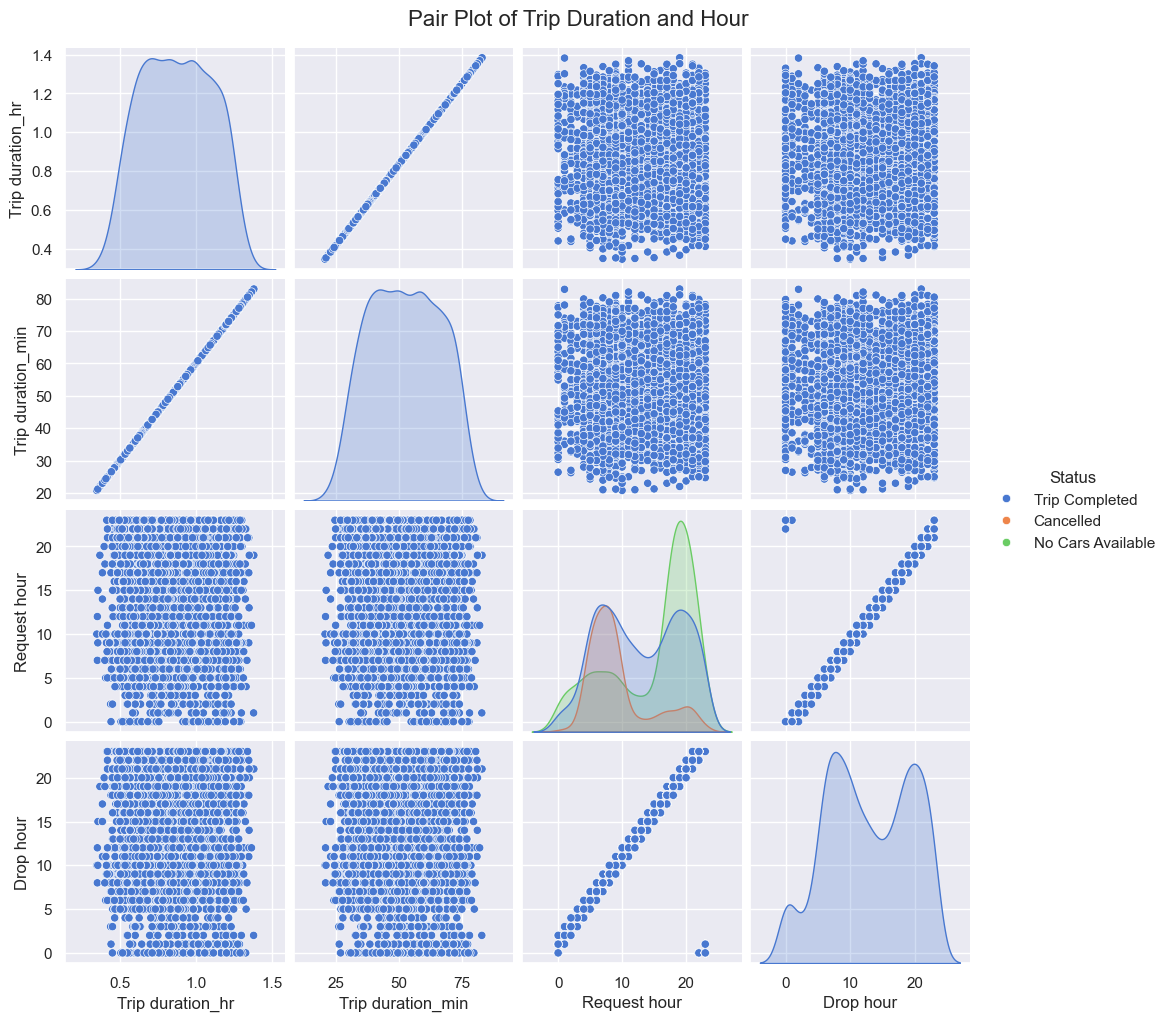

In [59]:
# Pair Plot visualization code
sns.pairplot(df, hue='Status', vars=['Trip duration_hr','Trip duration_min', 'Request hour', 'Drop hour'], palette='muted')
plt.suptitle('Pair Plot of Trip Duration and Hour', y=1.02, fontsize=16)
plt.show()


<div class="alert alert-block alert-info">
<b>Observation:</b> 

#### 1. Why did you pick the specific chart?
The pair plot was chosen because it provides a comprehensive visual summary of the relationships between multiple numerical variables (such as trip duration and hour) and how these relationships differ by trip status. It allows for quick identification of trends, clusters, and potential correlations in the data, while also highlighting the distribution of each variable.

#### 2. What is/are the insight(s) found from the chart?
The pair plot reveals that trip durations are fairly consistent, with most completed trips falling within a certain range. It also shows that requests and drop-offs are distributed throughout the day, but certain statuses (like "No Cars Available") cluster at specific hours, indicating supply-demand gaps during those times. Additionally, the strong linear relationship between trip duration in minutes and hours is clearly visible, as expected.

## **5. Additional Analysis**

### Analysis of City and Airport as pickup points

In [60]:
# Splitting the dataframe based on pick up points to do individual analysis

airport = df[df["Pickup point"] == "Airport"]


In [61]:
city = df[df["Pickup point"] == "City"]

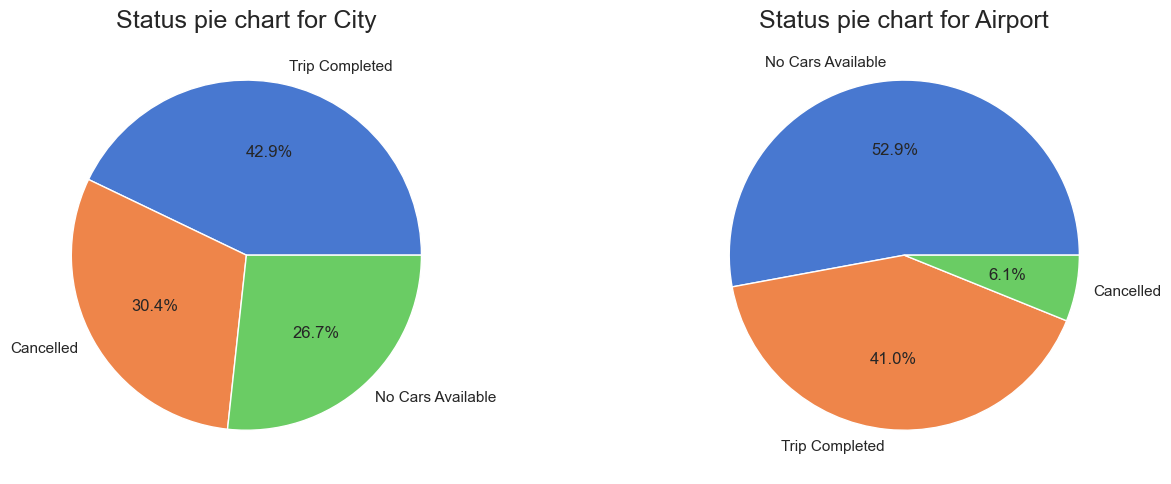

In [62]:
# Pie charts for Status distribution for City and Airport

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# City status pie chart
city_status_counts = city['Status'].value_counts()
axes[0].pie(city_status_counts, labels=city_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
axes[0].set_title('Status pie chart for City', fontsize=18)

# Airport status pie chart
airport_status_counts = airport['Status'].value_counts()
axes[1].pie(airport_status_counts, labels=airport_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
axes[1].set_title('Status pie chart for Airport', fontsize=18)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> 

1. Only ~ 40% of the trips are completed and 60% are not serviced. Demand exists and this must be exploited.
2. Drivers cancel trip to the airport from the city in the morning. There is some idle time involved and there is huge demand for cabs in the evening. Idle time at the airport could be cause of unavailabilty of drivers in the evening.
</div>

In [64]:
# Calculate demand (all requests) and supply (completed trips) for each timeslot in the city
city_demand = city.groupby('Request hour timeslot').size().rename('count')
city_supply = city[city['Status'] == 'Trip Completed'].groupby('Request hour timeslot').size().rename('Supply')

# Combine into a single DataFrame
city_demand_supply = pd.concat([city_demand, city_supply], axis=1).fillna(0).astype(int)

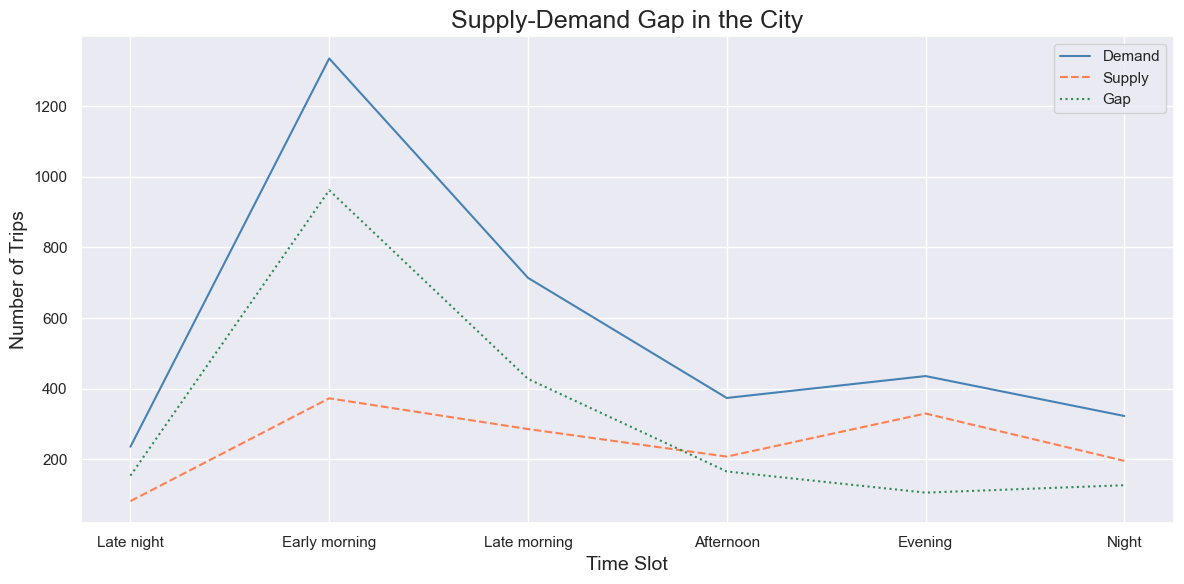

In [65]:
# Supply-Demand Gap in the City by Request hour timeslot

# Prepare data for plotting
city_demand_supply_sorted = city_demand_supply.loc[trip_time_label]  # Ensure correct order
demand = city_demand_supply_sorted['count']
supply = city_demand_supply_sorted['Supply']
gap = demand - supply

plt.figure(figsize=(12, 6))
plt.plot(trip_time_label, demand, label='Demand', color='steelblue')
plt.plot(trip_time_label, supply, label='Supply', linestyle='--', color='coral')
plt.plot(trip_time_label, gap, label='Gap', linestyle=':', color='seagreen')
plt.title('Supply-Demand Gap in the City', fontsize=18)
plt.xlabel('Time Slot', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b>

The chart reveals a significant supply-demand gap at the airport, especially during the evening and night time slots. While demand for cabs from the airport peaks sharply in the evening, the supply remains relatively constant and much lower, resulting in a large unmet demand (gap). This indicates that many customers are unable to get cabs during these peak hours, which could lead to customer dissatisfaction and lost revenue opportunities. Addressing this imbalance by increasing cab availability during high-demand periods could improve service levels and business outcomes.

</div>

## **6. Solution to Business Objective**

<div class="alert alert-block alert-success">

To address the business objective of minimizing cancellations and reducing the number of “No Cars Available” incidents, here are targeted recommendations Uber can implement:

1. **Optimize Driver Allocation During Peak Hours:**

- The data shows a significant mismatch between demand and available supply during early mornings (especially city → airport trips) and late evenings (especially airport → city trips).

- Uber should use this insight to dynamically reallocate or incentivize drivers to be available in these time slots, particularly at high-demand locations like airports.

2. **Driver Incentive Programs:**

- Introduce monetary incentives or bonuses for drivers who are active during high-gap time slots.

- Include trip-based rewards for city-airport and airport-city routes during rush hours.

3. **Demand Forecasting with Predictive Analytics:**

- Use machine learning models to predict demand surges based on time of day, location, and day of the week.

- This proactive forecasting can be used to notify drivers ahead of peak hours to position themselves accordingly.

4. **Dynamic Pricing (Surge Pricing) Optimization:**

- Leverage adaptive surge pricing to encourage more driver participation during undersupplied hours.

- Communicate clearly to riders why prices are higher (i.e., due to high demand/low supply), reducing negative customer experience.

5. **Operational Restructuring at Airports:**

- Set up dedicated holding zones and pickup lanes for Uber drivers at busy airports.

- Encourage local airport partnerships to facilitate smoother pickups and faster turnaround times for drivers.

6. **Customer Communication Enhancements:**

- Provide real-time visibility of estimated wait times to riders and alternate travel options when supply is critically low.

- Offer discounts or coupons to riders whose rides get canceled due to unavailability, improving retention.

# **Conclusion**

<div class="alert alert-block alert-success">
<b>Conclusion:</b>

The "Uber Supply Demand Gap EDA" project provides valuable insights into the key operational challenges Uber faces in balancing ride requests with driver availability. Through detailed exploratory data analysis, the project has uncovered that ride cancellations and “No Cars Available” issues are not randomly distributed but are heavily concentrated during specific time slots and routes—notably, early morning city-to-airport trips and evening airport-to-city trips.

These findings emphasize a temporal and geographic imbalance between supply and demand, underscoring the need for smarter driver deployment and improved demand management strategies. The project concludes that data-driven interventions, such as dynamic driver incentives, predictive demand analytics, and localized operational improvements (especially at airport hubs), can significantly reduce unmet demand.

By implementing the recommendations, Uber can move toward a more efficient, responsive, and customer-friendly ride experience, directly addressing the root causes of its supply-demand imbalance and improving both driver earnings and rider satisfaction.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***

In [ ]:
# Exporting the cleaned dataset to a new CSV file
df.to_csv('uber_cleaned_data.csv')